0.001
Train on 80 samples, validate on 20 samples
Epoch 1/100
80/80 [==============================] - 0s 6ms/step - loss: 3112.0115 - val_loss: 2489.0203
Epoch 2/100
80/80 [==============================] - 0s 5ms/step - loss: 2178.9202 - val_loss: 2286.8478
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 2015.3475 - val_loss: 2132.2181
Epoch 4/100
80/80 [==============================] - 0s 3ms/step - loss: 1875.3379 - val_loss: 1973.5179
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 1735.8511 - val_loss: 1831.1312
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 1598.0387 - val_loss: 1688.2539
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 1478.5209 - val_loss: 1567.3339
Epoch 8/100
80/80 [==============================] - 0s 3ms/step - loss: 1374.4030 - val_loss: 1460.8147
Epoch 9/100
80/80 [==============================] - 0s 2ms/step - loss: 1265.1650 - val_loss: 1350.8981
Epoch

80/80 [==============================] - 0s 3ms/step - loss: 20.5859 - val_loss: 34.8846
Epoch 80/100
80/80 [==============================] - 0s 2ms/step - loss: 19.4990 - val_loss: 34.8242
Epoch 81/100
80/80 [==============================] - 0s 3ms/step - loss: 19.5184 - val_loss: 35.3658
Epoch 82/100
80/80 [==============================] - 0s 3ms/step - loss: 18.7813 - val_loss: 33.6606
Epoch 83/100
80/80 [==============================] - 0s 2ms/step - loss: 18.5191 - val_loss: 31.2048
Epoch 84/100
80/80 [==============================] - 0s 2ms/step - loss: 18.4586 - val_loss: 34.6450
Epoch 85/100
80/80 [==============================] - 0s 3ms/step - loss: 17.3020 - val_loss: 30.2735
Epoch 86/100
80/80 [==============================] - 0s 2ms/step - loss: 17.8816 - val_loss: 31.1499
Epoch 87/100
80/80 [==============================] - 0s 2ms/step - loss: 18.0126 - val_loss: 31.4311
Epoch 88/100
80/80 [==============================] - 0s 4ms/step - loss: 17.5637 - val_loss: 3

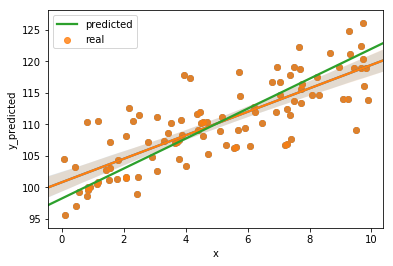

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

from keras.layers import Dense
from keras.models import Model, Sequential
from keras import initializers

## ---------- Create our linear dataset ---------------
## Set the mean, standard deviation, and size of the dataset, respectively
mu, sigma, size = 0, 4, 100

## Set the slope (m) and y-intercept (b), respectively
m, b = 2, 100

## Create a uniformally distributed set of X values between 0 and 10 and store in pandas dataframe
x = np.random.uniform(0,10, size)
df = pd.DataFrame({'x':x})

## Find the "perfect" y value corresponding to each x value given
df['y_perfect'] = df['x'].apply(lambda x: m*x+b)


## Create some noise and add it to each "perfect" y value to create a realistic y dataset
df['noise'] = np.random.normal(mu, sigma, size=(size,))
df['y'] = df['y_perfect']+df['noise']

## Plot our noisy dataset with a standard linear regression 
## (note seaborn, the plotting library, does the linear regression by default)
ax1 = sns.regplot(x='x', y='y', data=df)

##---------- Create our Keras Model -----------------
## Create our model with a single dense layer, with a linear activation function and glorot (Xavier) input normalization
model = Sequential([
        Dense(1, activation='linear', input_shape=(1,), kernel_initializer='glorot_uniform')
    ])

## Compile our model using the method of least squares (mse) loss function 
## and a stochastic gradient descent (sgd) optimizer
model.compile(loss='mse', optimizer='sgd') ## To try our model with an Adam optimizer simple replace 'sgd' with 'Adam'

## Set our learning rate to 0.01 and print it
model.optimizer.lr = (.001)
print(model.optimizer.lr)

## Fit our model to the noisy data we create above. Notes: 
## The validation split parameter reserves 20% of our data for validation (ie 80% will be used for training)
## I don't really know if using a batch size of 1 makes sense
history = model.fit(x=df['x'], y=df['y'], validation_split=0.2, batch_size=1, epochs=100)

## ---------- Review our weights -------------------
## Save and print our final weights
predicted_m = model.get_weights()[0][0][0]
predicted_b = model.get_weights()[1][0]
print("\nm=%.2f b=%.2f\n" % (predicted_m, predicted_b))

## Create our predicted y's based on the model
df['y_predicted'] = df['x'].apply(lambda x: predicted_m*x + predicted_b)

## Plot the original data with a standard linear regression
ax1 = sns.regplot(x='x', y='y', data=df, label='real')

## Plot our predicted line based on our Keras model's slope and y-intercept
ax2 = sns.regplot(x='x', y='y_predicted', data=df, scatter=False, label='predicted')
ax2.legend(loc="upper left")